# Importing necessary libraries

In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

# About data : This is data that validated the grade of performance with age and certain workout performance data.
age : 20 ~64 age between 20 to 64

gender : F,M contains 2 categories

height_cm this is height data in cm

weight_kg   this is weight data in kg

body fat_%      this is  body fat percentage

diastolic : diastolic blood pressure (min)

systolic : systolic blood pressure (min)

gripForce   It is force of body hand grip

sit and bend forward_cm  

sit-ups counts Number of max situp count

broad jump_cm It is broad jump in cm

class : A,B ( A: best) (B: not so good)/ performance grade

In [37]:
df = pd.read_csv("bodyPerformance.csv")
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,performance
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,B
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,B
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,A
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,A


# Data preprocessing

In [38]:
df.info()    #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13390 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  performance              13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


In [39]:
df.isna().sum()   #checking if any null value in any column

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 3
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
performance                0
dtype: int64

Above i checked if our data contains any null value. There were 3 null value in body fat column.

In [40]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [41]:
df['gender'].nunique()

2

In [42]:
df['performance'].nunique()

2

We used unique and nunique to find how many class are there in each column. There were only M and F in gender i checked to see if there was 3 class so to be sure i used unique.

In [43]:
df2 = df["body fat_%"].mean()   

calculating mean value of body fat column so that i can replace it in null value.

In [44]:
print(df2)

23.241294188722918


In [45]:
df = df.fillna(df2)  

Adding mean value on null cells by using fillna

In [46]:
df.isna().sum()   

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
performance                0
dtype: int64

Abpove i Checked if null value is remaining

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
gender = le.fit_transform(df['gender'])
rate = le.fit_transform(df['performance'])

Gender and rate were in string so I used lable encorder to tranform it to integer

In [49]:
df = df.drop("gender", axis ='columns')
df = df.drop("performance", axis ='columns')
df = df.drop("sit and bend forward_cm", axis ='columns')

In [50]:
df["gender"] = gender
df["performance"] = rate

Removing column that was string and replacing it with newly change column which was encoded with integer

In [51]:
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender,performance
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1,0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1,0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13388,25,172.1,71.80,16.2,74.0,141.0,35.8,47.0,198.0,1,1
13389,21,179.7,63.90,12.1,74.0,128.0,33.0,48.0,167.0,1,1
13390,39,177.2,80.50,20.1,78.0,132.0,63.5,45.0,229.0,1,0
13391,64,146.1,57.70,40.4,68.0,121.0,19.3,0.0,75.0,0,1


In [52]:
df['gender'].unique()
#male = 1  female = 0
# A = 0  B = 1 /A means best performance

array([1, 0])

# Data visualization

,age,gripForce
0,21,35.130737
1,22,35.376806
2,23,36.150269
3,24,37.759806
4,25,38.580901
5,26,39.005564
6,27,39.432234
7,28,40.061214
8,29,40.635381
9,30,42.965241


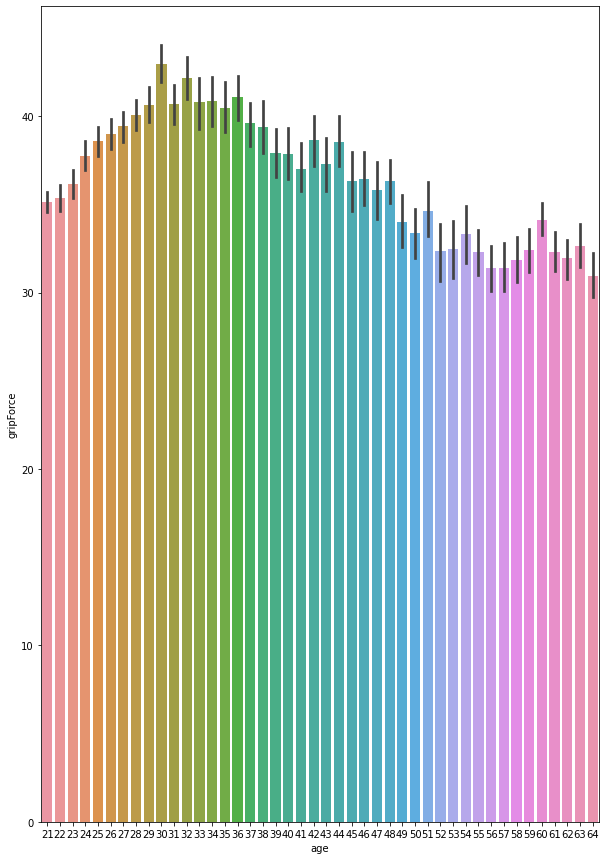

In [53]:
import seaborn as sns
plt.figure(figsize=(10,15))
sns.barplot(x='age', y = 'gripForce', data=df)
df.groupby('age', as_index=False).gripForce.mean()

We can see that our grip strength decreases with age where our maximum potential is between 30 - 40 of age.

,body fat_%,gripForce
0,3.0,53.030000
1,3.5,34.066667
2,4.0,56.300000
3,4.5,53.000000
4,4.7,65.000000
...,...,...
523,50.3,20.100000
524,50.6,36.900000
525,53.5,24.400000
526,54.9,37.500000


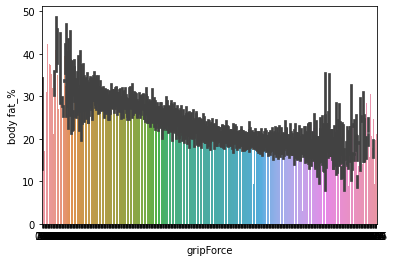

In [54]:
sns.barplot(x='gripForce', y = 'body fat_%', data=df)
# plt.figure(figsize=(30,30)) #Fig size was still conjusted 
df.groupby('body fat_%', as_index=False).gripForce.mean()

We can see the more fat our body contains our grip strength becomes weaker while its opposite when we have low body fat. Our grip strength increase when our fat percent is low.

,gender,gripForce
0,0,25.817994
1,1,43.448420


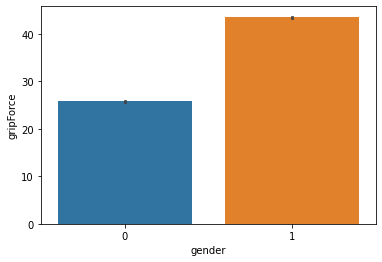

In [55]:
sns.barplot(x='gender', y = 'gripForce', data=df)
df.groupby('gender', as_index=False).gripForce.mean()

We can see in above graph that male = 1 have higher gripforce than female = 0. Male have about 40 where as female is around 25

<AxesSubplot:xlabel='gender', ylabel='sit-ups counts'>

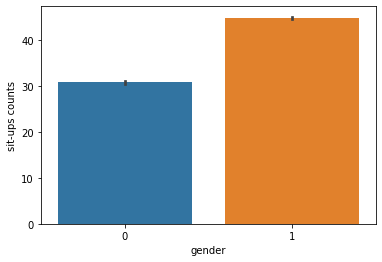

In [56]:
sns.barplot(x='gender', y = 'sit-ups counts', data=df)
#df.groupby('sit-ups counts', as_index=False).gender.mean()

We can see male have higher number of situp count so we can conclude male have high body performance compared to female

<AxesSubplot:xlabel='gender', ylabel='performance'>

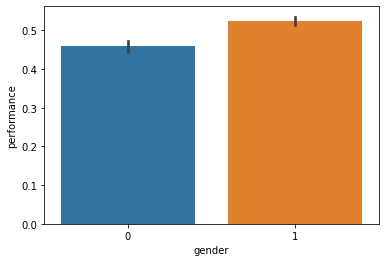

In [57]:
sns.barplot(x='gender', y = 'performance', data=df)

We can see higher body performance of male and female body performance is little lower than male

<AxesSubplot:xlabel='performance', ylabel='sit-ups counts'>

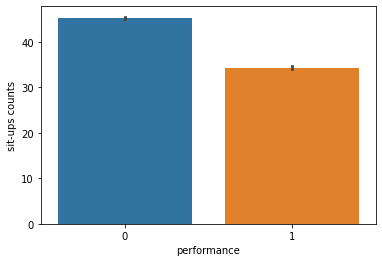

In [58]:
sns.barplot(x='performance', y = 'sit-ups counts', data=df)

We can see Higher the body performance higher the number of situp count

# Build Primary Model 

In [59]:
features = df.drop('performance', axis=1)
target = df['performance']

In [60]:
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

In [61]:
features

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...
13388,25,172.1,71.80,16.2,74.0,141.0,35.8,47.0,198.0,1
13389,21,179.7,63.90,12.1,74.0,128.0,33.0,48.0,167.0,1
13390,39,177.2,80.50,20.1,78.0,132.0,63.5,45.0,229.0,1
13391,64,146.1,57.70,40.4,68.0,121.0,19.3,0.0,75.0,0


In [62]:
target

0        1
1        0
2        1
3        0
4        0
        ..
13388    1
13389    1
13390    0
13391    1
13392    1
Name: performance, Length: 13393, dtype: int32

# Train Test Split

In [63]:
# import necessary  library from sklearn
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Implementing Logistic regression

In [64]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
# prediction of test data
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1347
           1       0.80      0.78      0.79      1332

    accuracy                           0.79      2679
   macro avg       0.79      0.79      0.79      2679
weighted avg       0.79      0.79      0.79      2679



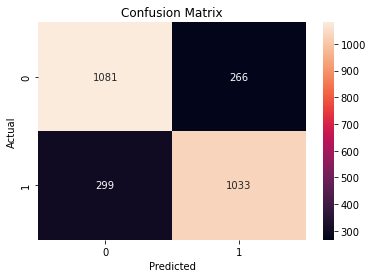

In [66]:
#Confusion matrix and classification report
from sklearn import metrics 
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred))

from above confusion matrix my model have predicted following values :

True Positive = 1081 

False Negative 266

False Postive = 299

True Negative = 1033

In [67]:
lr_scr=lr.score(X_test,y_test)
lr_scr

0.7891004106009705

# Implementing KNN algorithm

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1347
           1       0.78      0.70      0.74      1332

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



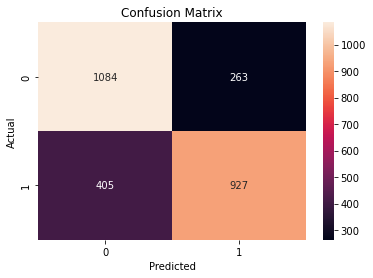

In [68]:
#importing the knn from sklearn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,y_pred_knn))

from above confusion matrix my model have predicted following values :

True Positive = 1084

False Negative 263

False Postive = 405

True Negative = 927

In [69]:
knn_scr=knn.score(X_test,y_test)
knn_scr

0.7506532288167227

In [70]:
y_pred_knn

array([1, 0, 0, ..., 0, 0, 1])

# Cross-Validation and Hyper-parameter tuning

In [71]:
#import GridsearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# making the dicitionary named param_grid to store the value of the hyperparameter
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()

knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [72]:
knn_hyper_scr = knn_cv.best_score_
knn_cv.best_score_

0.7662879119605533

In [73]:
knn_cv.best_params_

{'n_neighbors': 21}

In [74]:
# CV for logistic regression

# importing gridsearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_cv = GridSearchCV(LogisticRegression(), param_grid, cv =3)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [75]:
lr_cv.best_params_

{'C': 100}

In [76]:
lr_hyper_scr = lr_cv.best_score_
lr_cv.best_score_

0.7839277070097982

In [80]:
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender,performance
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1,0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1,0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1,0


In [81]:
features.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1


# Feature Selection

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(k='all')
fit = best_features.fit(features, target) 

In [83]:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
features_scores

,Features,Scores
0,age,26.362392
1,height_cm,21.087320
2,weight_kg,359.365158
3,body fat_%,1041.267304
4,diastolic,31.077825
5,systolic,4.516578
6,gripForce,203.204612
7,sit-ups counts,2305.841144
8,broad jump_cm,703.592320
9,gender,55.015775


In [84]:
features_scores_high_low = features_scores.sort_values(by='Scores', ignore_index=True, ascending=False).copy()
features_scores_high_low

,Features,Scores
0,sit-ups counts,2305.841144
1,body fat_%,1041.267304
2,broad jump_cm,703.592320
3,weight_kg,359.365158
4,gripForce,203.204612
5,gender,55.015775
6,diastolic,31.077825
7,age,26.362392
8,height_cm,21.087320
9,systolic,4.516578


In [85]:
X_train_chi = fit.transform(X_train)
X_test_chi = fit.transform(X_test)

In [86]:
X_train_chi

array([[ 27.  , 173.8 ,  87.  , ...,  50.  , 189.  ,   1.  ],
       [ 22.  , 160.7 ,  45.8 , ...,  35.  , 143.  ,   0.  ],
       [ 49.  , 149.9 ,  61.6 , ...,   8.  , 148.  ,   0.  ],
       ...,
       [ 27.  , 168.5 ,  49.44, ...,  47.  , 182.  ,   0.  ],
       [ 21.  , 169.5 ,  83.7 , ...,  43.  , 166.  ,   0.  ],
       [ 22.  , 172.1 ,  63.8 , ...,  60.  , 225.  ,   1.  ]])

In [87]:
X_test_chi

array([[ 21.  , 167.4 ,  72.18, ...,  21.  ,  94.  ,   0.  ],
       [ 42.  , 162.3 ,  67.3 , ...,  52.  , 219.  ,   1.  ],
       [ 36.  , 178.5 ,  90.5 , ...,  45.  , 262.  ,   1.  ],
       ...,
       [ 58.  , 163.2 ,  54.1 , ...,  46.  , 187.  ,   1.  ],
       [ 37.  , 172.6 ,  75.12, ...,  49.  , 226.  ,   1.  ],
       [ 50.  , 159.3 ,  60.4 , ...,  21.  , 142.  ,   0.  ]])

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_selected_feature_model = knn_model.fit(X_train_chi,y_train)

In [89]:
knn_selected_feature_model.score(X_test_chi, y_test)

0.7629712579320642

In [90]:
best_features = SelectKBest(score_func=chi2, k = 9)
fit = best_features.fit(features, target) 

In [91]:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
features_scores

,Features,Scores
0,age,132.838191
1,height_cm,8.869913
2,weight_kg,740.992931
3,body fat_%,2188.870607
4,diastolic,45.408846
5,systolic,7.506321
6,gripForce,611.356366
7,sit-ups counts,10082.057564
8,broad jump_cm,5588.729854
9,gender,20.155242


In [92]:
features_scores_high_low = features_scores.sort_values(by='Scores', ignore_index=True, ascending=False).copy()
features_scores_high_low

,Features,Scores
0,sit-ups counts,10082.057564
1,broad jump_cm,5588.729854
2,body fat_%,2188.870607
3,weight_kg,740.992931
4,gripForce,611.356366
5,age,132.838191
6,diastolic,45.408846
7,gender,20.155242
8,height_cm,8.869913
9,systolic,7.506321


In [93]:
X_train_chi = fit.transform(X_train)
X_test_chi = fit.transform(X_test)

In [94]:
X_train_chi

array([[ 27.  , 173.8 ,  87.  , ...,  50.  , 189.  ,   1.  ],
       [ 22.  , 160.7 ,  45.8 , ...,  35.  , 143.  ,   0.  ],
       [ 49.  , 149.9 ,  61.6 , ...,   8.  , 148.  ,   0.  ],
       ...,
       [ 27.  , 168.5 ,  49.44, ...,  47.  , 182.  ,   0.  ],
       [ 21.  , 169.5 ,  83.7 , ...,  43.  , 166.  ,   0.  ],
       [ 22.  , 172.1 ,  63.8 , ...,  60.  , 225.  ,   1.  ]])

In [95]:
X_test_chi

array([[ 21.  , 167.4 ,  72.18, ...,  21.  ,  94.  ,   0.  ],
       [ 42.  , 162.3 ,  67.3 , ...,  52.  , 219.  ,   1.  ],
       [ 36.  , 178.5 ,  90.5 , ...,  45.  , 262.  ,   1.  ],
       ...,
       [ 58.  , 163.2 ,  54.1 , ...,  46.  , 187.  ,   1.  ],
       [ 37.  , 172.6 ,  75.12, ...,  49.  , 226.  ,   1.  ],
       [ 50.  , 159.3 ,  60.4 , ...,  21.  , 142.  ,   0.  ]])

In [96]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_selected_feature_model = knn_model.fit(X_train_chi,y_train)

In [97]:
knn_selected_feature_model.score(X_test_chi, y_test)

0.7741694662187384

# Final Model

In [98]:
df.head(5)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender,performance
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1,0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1,0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1,0


In [99]:
df5 = df
df5

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender,performance
0,27,172.3,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1,1
1,25,165.0,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1,0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1,1
3,32,174.5,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1,0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13388,25,172.1,71.80,16.2,74.0,141.0,35.8,47.0,198.0,1,1
13389,21,179.7,63.90,12.1,74.0,128.0,33.0,48.0,167.0,1,1
13390,39,177.2,80.50,20.1,78.0,132.0,63.5,45.0,229.0,1,0
13391,64,146.1,57.70,40.4,68.0,121.0,19.3,0.0,75.0,0,1


In [100]:
df5 = df.drop("systolic", axis ='columns')
df5 = df.drop("height_cm", axis ='columns')
df5.head(5)

,age,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender,performance
0,27,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1,1
1,25,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1,0
2,31,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1,1
3,32,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1,0
4,28,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1,0


In [101]:
features = df5.drop('performance', axis=1)
target = df5['performance']

In [102]:
features

,age,weight_kg,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,gender
0,27,75.24,21.3,80.0,130.0,54.9,60.0,217.0,1
1,25,55.80,15.7,77.0,126.0,36.4,53.0,229.0,1
2,31,78.00,20.1,92.0,152.0,44.8,49.0,181.0,1
3,32,71.10,18.4,76.0,147.0,41.4,53.0,219.0,1
4,28,67.70,17.1,70.0,127.0,43.5,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...
13388,25,71.80,16.2,74.0,141.0,35.8,47.0,198.0,1
13389,21,63.90,12.1,74.0,128.0,33.0,48.0,167.0,1
13390,39,80.50,20.1,78.0,132.0,63.5,45.0,229.0,1
13391,64,57.70,40.4,68.0,121.0,19.3,0.0,75.0,0


In [103]:
target

0        1
1        0
2        1
3        0
4        0
        ..
13388    1
13389    1
13390    0
13391    1
13392    1
Name: performance, Length: 13393, dtype: int32

In [104]:
# train test split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)

In [105]:
# logistic regression final model
lr_final  = LogisticRegression(C=100)
lr_final.fit(X_train_final, y_train_final)

LogisticRegression(C=100)

In [106]:
y_pred_lr_final = lr_final.predict(X_test_final)
y_pred_lr_final

array([1, 0, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1347
           1       0.79      0.74      0.76      1332

    accuracy                           0.77      2679
   macro avg       0.77      0.77      0.77      2679
weighted avg       0.77      0.77      0.77      2679



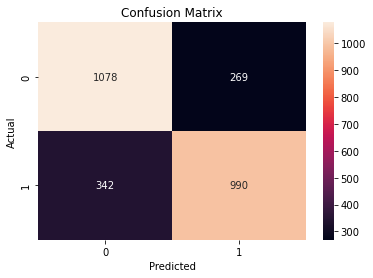

In [107]:
matrix = confusion_matrix(y_test_final, y_pred_lr_final)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test_final, y_pred_lr_final))

from above confusion matrix my model have predicted following values :

True Positive = 1078

False Negative 269

False Postive = 342

True Negative = 990

In [108]:
lr_final_scr=lr_final.score(X_test_final,y_test_final)
lr_final_scr

0.7719298245614035

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1347
           1       0.82      0.66      0.73      1332

    accuracy                           0.76      2679
   macro avg       0.77      0.76      0.76      2679
weighted avg       0.77      0.76      0.76      2679



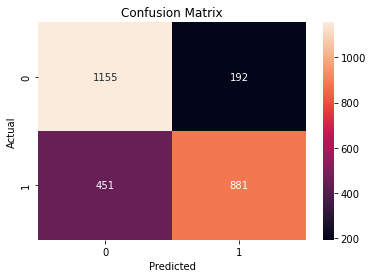

In [109]:
# knn algorithm final
knn_final = KNeighborsClassifier(n_neighbors = 12)
knn_final.fit(X_train_final, y_train_final)
y_pred_knn_final = knn_final.predict(X_test_final)

matrix = confusion_matrix(y_test_final, y_pred_knn_final)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test_final,y_pred_knn_final))

from above confusion matrix my model have predicted following values :

True Positive = 1155

False Negative 192

False Postive = 451

True Negative = 881

In [110]:
knn_final_scr=knn_final.score(X_test_final,y_test_final)
knn_final_scr

0.7599850690556178

# Conclusion

In [111]:
# Building accurcy table of models
indexes = ['Logistic Regression', 'K Nearest Neighbors']
accuracy_score = {
    'Normal Model Accuracy': [lr_scr, knn_scr],
    'Selected feature and turned parameter model accuracy': [lr_hyper_scr, knn_hyper_scr],
    'Final Model': [lr_final_scr, knn_final_scr]
}
accuracy_table = pd.DataFrame(accuracy_score, index = indexes)
accuracy_table

,Normal Model Accuracy,Selected feature and turned parameter model accuracy,Final Model
Logistic Regression,0.789100,0.783928,0.771930
K Nearest Neighbors,0.750653,0.766288,0.759985


In conclusion, the best accuracy is seen while model is trained using logistic regression than knn with a small margin. CV and Hyper Parameter tuning should increase the accuracy which is right incase of KNN algorithm but in logistic regression accuracy is slightly decreased. But the final model accuracy of both is increased when best value of hypermeter is taken

The accuracy table shows that logistic regression provides the greatest accuracy in this dataset. After the characteristics are chosen, the logistic regression yields an accuracy of 78.91 percent, which is higher than the primary model.